In [1]:
import tensorflow as tf
import tensorflow.keras.layers as layers
import numpy as np

# Clear any previous TensorFlow session to avoid layer name conflicts
tf.keras.backend.clear_session()

# First method - renaming layers to unique names
seq_model = tf.keras.Sequential()

seq_model.add(layers.Flatten(input_shape=[3, 3]))
seq_model.add(layers.Dense(16, name="input_layer_1"))  # Unique name
seq_model.add(layers.Dense(32, name="hidden_layer_1"))  # Unique name
seq_model.add(layers.Dense(4, name="output_layer_1"))   # Unique name

# Second method (renaming layers to make them unique)
seq_model_2 = tf.keras.Sequential([
    layers.Flatten(input_shape=[3, 3]),  # Specify input_shape here
    layers.Dense(16, name="input_layer_2"),  # Unique name
    layers.Dense(32, name="hidden_layer_2"),  # Unique name
    layers.Dense(4, name="output_layer_2")    # Unique name
])

# Generate sample input data with a size matching input_shape [3, 3]
input_data = np.random.random((1, 3, 3))  # batch size = 1, input shape = [3, 3]

# Run our model with the generated data
output = seq_model_2(input_data)
print(output)



tf.Tensor([[ 0.2798375   0.37593812  0.6008991  -0.23847395]], shape=(1, 4), dtype=float32)


C:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [2]:
import numpy as np
import tensorflow as tf

# Load the Fashion MNIST dataset
train, test = tf.keras.datasets.fashion_mnist.load_data()

# Extract images and labels from the training data
images, labels = train

# Normalize pixel values (the maximum value is 255.0,
# so to normalize the data, we need to divide each pixel by the max value)
images = images / 255.0

# Convert labels to integer data type
labels = labels.astype(np.int32)


In [3]:
import tensorflow as tf

# Example Python list
list_pythonowa = [1, 2, 3, 4, 5]

# Convert the Python list to a tf.data.Dataset
dataset = tf.data.Dataset.from_tensor_slices(list_pythonowa)

# Iterate over the dataset and print elements
for element in dataset:
    print(element.numpy())

1
2
3
4
5


In [4]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
X_train, X_test, y_train, y_test = \
    train_test_split(images, labels, test_size=0.1)

# Create a Dataset object from our list
train_ds = tf.data.Dataset.from_tensor_slices((X_train, y_train))

# Set batch_size to 32 and shuffle based on 1000 samples
train_ds = train_ds.shuffle(1000).batch(32)


In [5]:
import tensorflow as tf
from tensorflow.keras import layers

# Define the model
f_mnist_model = tf.keras.Sequential([
    # Explicitly define the input layer with the desired shape
    layers.Input(shape=[28, 28]),

    # Flatten the image into a one-dimensional vector
    layers.Flatten(),  # Flatten the 28x28 input image

    # Dense layers with ReLU activation
    layers.Dense(300, activation='relu'),
    layers.Dense(150, activation='relu'),

    # The last layer has as many neurons as there are classes
    layers.Dense(10, activation='softmax')  # 10 classes, softmax for classification
])

# Compile the model
f_mnist_model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
f_mnist_model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 150)                 │          45,150 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 282,160 (1.08 MB)

 Trainable params: 282,160 (1.08 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
f_mnist_model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [7]:
train_stats = f_mnist_model.fit(train_ds, epochs=10, verbose=1)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7894 - loss: 0.6021
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8616 - loss: 0.3762
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8763 - loss: 0.3338
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8848 - loss: 0.3089
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8904 - loss: 0.2926
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8970 - loss: 0.2754
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9018 - loss: 0.2591
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9058 - loss: 0.2472
Epoch 9/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9091 - loss: 0.2375
Epoch 10/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9148 - loss: 0.2244


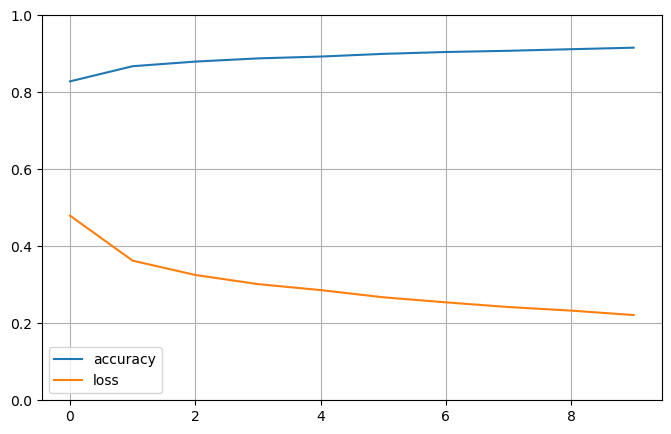

In [8]:
 import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(train_stats.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [9]:
y_pred = f_mnist_model.predict(X_test)
print("probs : ", y_pred[2])
print("klasa :", np.argmax(y_pred[2]))
print("rzeczywista klasa: ", y_test[2])

"""
probs :  [4.0548810e-15 1.0000000e+00 9.3477974e-17 5.3090128e-13 7.5702587e-15
 5.9295928e-25 2.1536054e-11 3.4459677e-24 2.8725664e-16 2.4974258e-22]
klasa : 1
rzeczywista klasa:  1
"""

188/188 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
probs :  [4.6431148e-13 3.9567169e-12 5.2702803e-12 8.1153237e-13 7.7680456e-13
 1.2541192e-03 3.4198841e-10 6.5373938e-06 2.5441587e-13 9.9873930e-01]
klasa : 9
rzeczywista klasa:  9


'\nprobs :  [4.0548810e-15 1.0000000e+00 9.3477974e-17 5.3090128e-13 7.5702587e-15\n 5.9295928e-25 2.1536054e-11 3.4459677e-24 2.8725664e-16 2.4974258e-22]\nklasa : 1\nrzeczywista klasa:  1\n'

In [10]:
import tensorflow as tf
from tensorflow.keras import layers

# Create the input
input = tf.keras.Input(shape=X_train.shape[1:])

# We can print what this layer accepts - it shows the size
# of our image without batch_size (which is set to None)
print(input)

# Flatten the input
input_flat = layers.Flatten()(input)  # No need to specify input_shape again

# Our next layer is a Dense layer, as before, and we
# directly pass the input to it, just like a Python function:
hidden_1 = layers.Dense(320, activation='relu', name="hidden_1")(input_flat)
hidden_2 = layers.Dense(150, activation='relu', name="hidden_2")(hidden_1)

# Concatenate the results from both layers using a Concatenate layer
concat_layer = layers.Concatenate()([input_flat, hidden_2])
output = layers.Dense(10, activation='softmax')(concat_layer)

# Create the model, specifying the inputs and outputs
model_res = tf.keras.Model(inputs=[input], outputs=[output])

# Model summary
model_res.summary()


<KerasTensor shape=(None, 28, 28), dtype=float32, sparse=False, name=keras_tensor_21>


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)    │ (None, 28, 28)            │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ flatten_3 (Flatten)           │ (None, 784)               │               0 │ input_layer_3[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ hidden_1 (Dense)              │ (None, 320)               │         251,200 │ flatten_3[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ hidden_2 (Dense)              │ (None, 150)               │          48,150 │ hidden_1[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate (Concatenate)     │ (None, 934)               │               0 │ flatten_3[0][0],           │
│                               │                           │                 │ hidden_2[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_3 (Dense)               │ (None, 10)                │           9,350 │ concatenate[0][0]          │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 308,700 (1.18 MB)

 Trainable params: 308,700 (1.18 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
text = np.array([["Ala has a cat"]])

input_1 = tf.keras.Input(shape=text.shape[1:])
input_2 = tf.keras.Input(shape=X_train.shape[1:])

# Our next layer is a Dense layer, as before,
# but we immediately pass the input to it, like a function in Python
hidden_1 = layers.Dense(320, activation='relu')(input_1)
hidden_2 = layers.Dense(150, activation='relu')(hidden_1)

# We concatenate the results of our layers using a Concatenate layer,
# passing input_1 and hidden_2 as arguments
concat_layer = layers.Concatenate()([input_1, hidden_2])
output = layers.Dense(10, activation='softmax')(concat_layer)

# We create a model, specifying what should be the inputs and outputs
model = tf.keras.Model(inputs=[input_1, input_2], outputs=[output])

# Summary of our model
model.summary()


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)    │ (None, 1)                 │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_4 (Dense)               │ (None, 320)               │             640 │ input_layer_4[0][0]        │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_5 (Dense)               │ (None, 150)               │          48,150 │ dense_4[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ concatenate_1 (Concatenate)   │ (None, 151)               │               0 │ input_layer_4[0][0],       │
│                               │                           │                 │ dense_5[0][0]              │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ input_layer_5 (InputLayer)    │ (None, 28, 28)            │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_6 (Dense)               │ (None, 10)                │           1,520 │ concatenate_1[0][0]        │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 50,310 (196.52 KB)

 Trainable params: 50,310 (196.52 KB)

 Non-trainable params: 0 (0.00 B)

Task : Fashion - Mnist

Step 1: Implement the neural network to achieve test accuracy > 0.94

In [12]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Load the Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0


In [13]:
# Reshape the data to include the channel dimension for grayscale images (28x28x1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Further split the training set into training and validation sets (90% train, 10% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=10, stratify=y_train)


In [14]:
# Function to create a CNN model
def create_cnn_model():
    model = models.Sequential()

    # Input layer
    model.add(layers.Input(shape=(28, 28, 1)))  # Explicitly define input shape (28x28x1) for grayscale images

    # First convolutional block
    model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Second convolutional block
    model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))

    # Flatten the output and add fully connected layers
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))  # Dropout to prevent overfitting

    # Output layer for 10 classes
    model.add(layers.Dense(10, activation='softmax'))

    return model


In [15]:
# Create and compile the CNN model
model = create_cnn_model()

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Train the model
history = model.fit(
    X_train, y_train, 
    epochs=10, 
    validation_data=(X_val, y_val), 
    verbose=1
)


Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 12ms/step - accuracy: 0.7129 - loss: 0.7961 - val_accuracy: 0.8613 - val_loss: 0.3858
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.8462 - loss: 0.4292 - val_accuracy: 0.8835 - val_loss: 0.3138
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8734 - loss: 0.3562 - val_accuracy: 0.8938 - val_loss: 0.2920
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8834 - loss: 0.3221 - val_accuracy: 0.8953 - val_loss: 0.2719
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8925 - loss: 0.2928 - val_accuracy: 0.9015 - val_loss: 0.2609
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 11ms/step - accuracy: 0.8998 - loss: 0.2752 - val_accuracy: 0.9125 - val_loss: 0.2413
Epoch 7/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9061 - loss: 0.2568 - val_accuracy: 0.9093 - val_loss: 0.2439
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9125 -

In [16]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_acc}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9098 - loss: 0.2672
Test accuracy: 0.9079999923706055


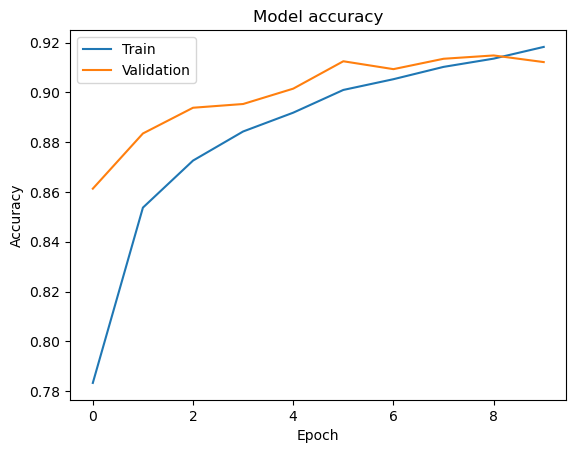

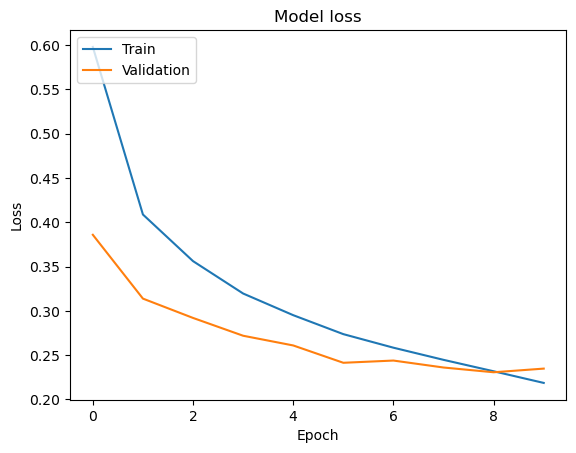

In [17]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [18]:
# Function to predict and display an image with its predicted class
def predict_and_display(model, image, true_label):
    # Reshape and normalize the image
    image = np.expand_dims(image, axis=0)  # Add batch dimension (1, 28, 28, 1)
    image = image / 255.0

    # Make a prediction
    prediction = model.predict(image)
    predicted_class = np.argmax(prediction, axis=1)[0]  # Get the class with the highest probability

    # Display the input image
    plt.imshow(image[0].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {predicted_class}, True: {true_label}")
    plt.axis('off')
    plt.show()

    return predicted_class


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step


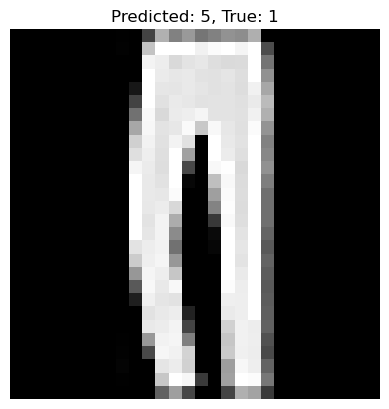

5

In [19]:
# Example of predicting and displaying an image from the test set
predict_and_display(model, X_test[2], y_test[2])


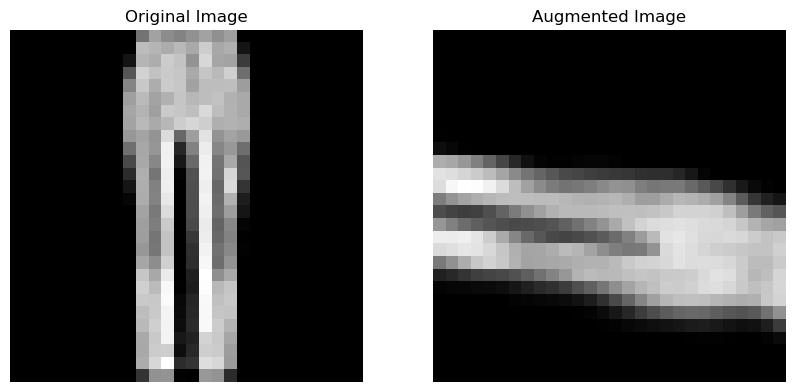

In [20]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
import albumentations as A
import matplotlib.pyplot as plt

# Load the Fashion-MNIST dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize the pixel values to the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the data to include the channel dimension for grayscale images (28x28x1)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# Further split the training set into training and validation sets (90% train, 10% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=10, stratify=y_train)

# Define an updated augmentation pipeline
augmentation_pipeline = A.Compose([
    A.RandomRotate90(),
    A.HorizontalFlip(),  # Replaced Flip with HorizontalFlip
    A.Transpose(),
    A.ShiftScaleRotate(shift_limit=0.1, scale_limit=0.1, rotate_limit=15, p=0.5),
    A.Perspective(p=0.5),  # Native Albumentations' Perspective transformation
    A.RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, p=0.5),
])

# Function to apply augmentations using Albumentations
def augment_image(image):
    # Albumentations works with images in the format (H, W, C), where C is the channel count
    image = image.squeeze()  # Remove the channel dimension for Albumentations to work
    augmented = augmentation_pipeline(image=image)
    return augmented['image'].reshape(28, 28, 1)  # Reshape back to (28, 28, 1)

# Example of augmenting one image
example_image = X_train[0]
augmented_image = augment_image(image=example_image)

# Visualize the original and augmented image
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(augmented_image.reshape(28, 28), cmap='gray')
plt.title("Augmented Image")
plt.axis('off')

plt.show()


In [21]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
import os

# Enable mixed precision training for speedup
from tensorflow.keras import mixed_precision
policy = mixed_precision.Policy('mixed_float16')
mixed_precision.set_global_policy(policy)

# Load the dataset without resizing in memory
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Convert grayscale images to 3-channel RGB (required for MobileNetV2)
X_train = np.repeat(X_train[..., np.newaxis], 3, axis=-1)  # Convert (N, 28, 28) to (N, 28, 28, 3)
X_test = np.repeat(X_test[..., np.newaxis], 3, axis=-1)    # Same for test set

# Dynamic image resizing during training
def preprocess_image(image, label):
    image = tf.image.resize(image, [96, 96])  # Resize to 96x96 on the fly
    image = image / 255.0  # Normalize image
    return image, label

# Prepare datasets with dynamic preprocessing and smaller batch size
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
train_dataset = train_dataset.map(preprocess_image).batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))
val_dataset = val_dataset.map(preprocess_image).batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)

# Load a smaller pre-trained MobileNetV2 model (with alpha=0.35 for smaller size)
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3), alpha=0.35)

# Fine-tune only the last 5 layers to reduce training time
for layer in base_model.layers[:-5]:
    layer.trainable = False

# Build and compile the model
def create_transfer_learning_model():
    model = models.Sequential()
    model.add(base_model)
    model.add(layers.GlobalAveragePooling2D())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(10, activation='softmax'))
    return model

model = create_transfer_learning_model()

# Compile the model with an initial learning rate
initial_lr = 1e-4
optimizer = Adam(learning_rate=initial_lr)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Callbacks for learning rate reduction, early stopping, and checkpointing
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.keras', monitor='val_accuracy', save_best_only=True, mode='max')

# Train the model for more epochs with optimized settings
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=30,  # Reduced epochs
    callbacks=[lr_scheduler, early_stopping, checkpoint]
)

# Evaluate the model on the validation set
test_loss, test_acc = model.evaluate(val_dataset)
print(f"Test accuracy after fine-tuning: {test_acc}")


2019640/2019640 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step
Epoch 1/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 857s 453ms/step - accuracy: 0.7448 - loss: 0.8254 - val_accuracy: 0.8790 - val_loss: 0.3385 - learning_rate: 1.0000e-04
Epoch 2/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 827s 441ms/step - accuracy: 0.8742 - loss: 0.3620 - val_accuracy: 0.8959 - val_loss: 0.2932 - learning_rate: 1.0000e-04
Epoch 3/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 834s 445ms/step - accuracy: 0.8936 - loss: 0.3032 - val_accuracy: 0.9046 - val_loss: 0.2755 - learning_rate: 1.0000e-04
Epoch 4/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 847s 452ms/step - accuracy: 0.9064 - loss: 0.2609 - val_accuracy: 0.9066 - val_loss: 0.2624 - learning_rate: 1.0000e-04
Epoch 5/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 847s 452ms/step - accuracy: 0.9155 - loss: 0.2359 - val_accuracy: 0.9098 - val_loss: 0.2687 - learning_rate: 1.0000e-04
Epoch 6/30
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 867s 454ms/step - accuracy: 0.9240 - loss: 0.2121 - val_accuracy: 0.9114 - val_loss: 0.2603 - learn